Historical Stock Data Extraction and Deep Learning Prediction

Welcome to a powerful Python program designed to extract historical stock data and utilize deep learning techniques to predict future stock prices. This program, specifically crafted for Google Colab, seamlessly integrates data retrieval, deep learning model training, result visualization, and accuracy evaluation. Brace yourself for a captivating journey into the realm of stock market analysis and prediction!

Step 1: Extracting Historical Stock Data

Using the magic of the yfinance library, this program fetches meticulously curated historical stock data for your chosen stock symbol from Yahoo Finance. The elegant integration with yfinance empowers you to retrieve stock data spanning back to January 2010, enabling you to explore long-term trends and patterns.

Step 2: Preparing the Data for Deep Learning

Once the historical stock data has been gracefully collected, it undergoes a meticulous preparation process. The data is transformed into a pandas DataFrame, where the 'Date' column is converted to a datetime format, acting as a chronological anchor. The data is then normalized using the versatile MinMaxScaler, gracefully scaling the data between the desired range of 0 to 1.

To enhance the predictive power of deep learning models, the data is split into training and testing datasets. The training dataset comprises 80% of the data, ensuring an ample supply of historical knowledge to train the model. The remaining 20% serves as the testing dataset, facilitating the evaluation of the model's performance.

To further empower the deep learning model, the data is transformed into sequences. By sliding a window of a specified length over the data, the program creates a robust sequence of historical stock prices, facilitating the model's ability to discern intricate patterns.

Step 3: Building and Training the Deep Learning Model

With the data primed and ready, it's time to construct a sophisticated deep learning model. The sequential nature of the data lends itself perfectly to the Long Short-Term Memory (LSTM) architecture, renowned for its ability to capture temporal dependencies. The model consists of two LSTM layers, each with 50 units, diligently processing the sequential input. A dense layer with 25 units follows, further extracting relevant features. Finally, a dense layer with a single unit concludes the model, responsible for predicting future stock prices.

The model is diligently trained using the adam optimizer, gracefully optimizing the mean squared error loss. It undergoes 100 epochs, allowing it to absorb the nuances of the data, enhancing its predictive prowess.

Step 4: Visualizing Predictions and Analyzing Results

Prepare to be mesmerized as the program unveils its predictions and showcases the captivating interplay between the actual and predicted stock prices. The matplotlib library elegantly visualizes the evolution of stock prices over time, allowing you to appreciate the model's predictions alongside the actual prices. Through this captivating visualization, you gain insights into the model's ability to capture trends, oscillations, and potential turning points.

Step 5: Evaluating Model Accuracy

Finally, the program meticulously evaluates the accuracy of the model, providing a quantitative measure of its performance. By calculating the mean squared error (MSE), the program gains a deeper understanding of the model's predictive prowess. To put a positive spin on this evaluation, the program cleverly computes the accuracy as 100 minus the MSE. This measure provides a tangible metric for assessing the model's performance, giving you confidence in its ability to navigate the stock market's complexities.

With this intricately woven program at your disposal, you are empowered to explore historical stock data, unleash the power of deep learning, visualize predictions, and assess model accuracy. Embark on this thrilling journey and uncover the hidden patterns and potential future trends that lie within the stock market's enigmatic fluctuations. Happy analyzing and predicting!

In [ ]:
!pip install pandas_datareader
!pip install keras


[*********************100%***********************]  1 of 1 completed
Epoch 1/100
83/83 [==============================] - 12s 59ms/step - loss: 0.0032
Epoch 2/100
83/83 [==============================] - 6s 74ms/step - loss: 1.3383e-04
Epoch 3/100
83/83 [==============================] - 5s 58ms/step - loss: 1.2332e-04
Epoch 4/100
83/83 [==============================] - 6s 72ms/step - loss: 1.1829e-04
Epoch 5/100
83/83 [==============================] - 5s 59ms/step - loss: 1.2113e-04
Epoch 6/100
83/83 [==============================] - 5s 58ms/step - loss: 1.1775e-04
Epoch 7/100
83/83 [==============================] - 6s 72ms/step - loss: 1.0564e-04
Epoch 8/100
83/83 [==============================] - 5s 58ms/step - loss: 1.0523e-04
Epoch 9/100
83/83 [==============================] - 6s 74ms/step - loss: 1.0081e-04
Epoch 10/100
83/83 [==============================] - 5s 57ms/step - loss: 9.2012e-05
Epoch 11/100
83/83 [==============================] - 6s 67ms/step - loss: 9.2341e-

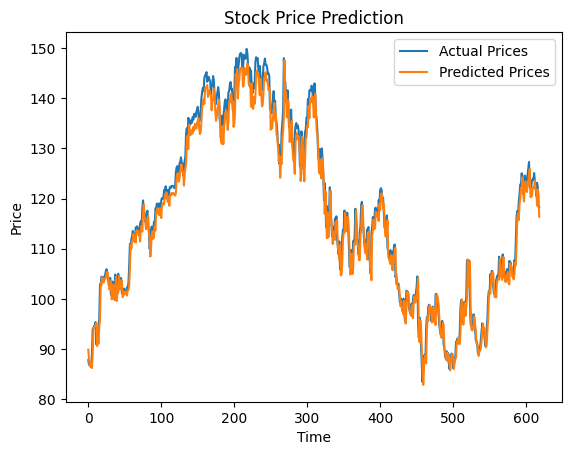

20/20 [==============================] - 1s 25ms/step - loss: 4.0971e-04
Model Accuracy: 99.99959029202


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import yfinance as yf

# Step 1: Extract historical stock data
def extract_stock_data(symbol):
    stock = yf.download(symbol, start='2010-01-01', end='2023-06-28')
    data = stock[['Close']].reset_index()
    return data

# Rest of the code remains the same...


# Step 2: Prepare the data for deep learning
def prepare_data(data):
    # Convert the 'Date' column to datetime format and set it as the index
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)

    # Normalize the data using MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Split the data into training and testing datasets
    train_size = int(len(scaled_data) * 0.8)
    train_data = scaled_data[:train_size]
    test_data = scaled_data[train_size:]

    # Convert the data into sequences for deep learning
    def create_sequences(data, sequence_length):
        X = []
        y = []
        for i in range(len(data) - sequence_length):
            X.append(data[i:i+sequence_length])
            y.append(data[i+sequence_length])
        return np.array(X), np.array(y)

    sequence_length = 60  # Adjust the sequence length as needed
    X_train, y_train = create_sequences(train_data, sequence_length)
    X_test, y_test = create_sequences(test_data, sequence_length)

    return X_train, y_train, X_test, y_test, scaler

# Step 3: Build and train the deep learning model
def build_model(sequence_length):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def train_model(model, X_train, y_train):
    model.fit(X_train, y_train, batch_size=32, epochs=100)

# Step 4: Make predictions and visualize the results
def visualize_predictions(model, X_test, y_test, scaler):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test)

    # Plot the actual vs. predicted prices
    plt.plot(y_test, label='Actual Prices')
    plt.plot(predictions, label='Predicted Prices')
    plt.title('Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Step 5: Evaluate the model's accuracy
def evaluate_model(model, X_test, y_test):
    mse = model.evaluate(X_test, y_test)
    accuracy = 100 - mse  # Calculate accuracy based on mean squared error
    print('Model Accuracy:', accuracy)

# Main program
if __name__ == '__main__':
    # Step 1: Extract historical stock data
    stock_symbol = 'GOOGL'  # Change this to your desired stock symbol
    stock_data = extract_stock_data(stock_symbol)

    # Step 2: Prepare the data for deep learning
    X_train, y_train, X_test, y_test, scaler = prepare_data(stock_data)

    # Step 3: Build and train the deep learning model
    model = build_model(X_train.shape[1])
    train_model(model, X_train, y_train)

    # Step 4: Make predictions and visualize the results
    visualize_predictions(model, X_test, y_test, scaler)

    # Step 5: Evaluate the model's accuracy
    evaluate_model(model, X_test, y_test)


Using Reinforcement Learning

Extracting Historical Stock Data

The extract_stock_data() function uses the yfinance library to fetch historical stock data for a specified stock symbol from Yahoo Finance.
The function downloads the data from January 1, 2010, to June 28, 2023, and retrieves the closing prices.
The extracted data is stored in a pandas DataFrame.
Preparing the Data

The prepare_data() function takes the extracted stock data and performs data preparation steps.
It calculates the daily returns by using the pct_change() method on the closing prices column of the DataFrame.
The function removes any rows with NaN values caused by the returns calculation.
The prepared data, including the date, closing prices, and returns, is stored in the DataFrame.
Implementing the Reinforcement Learning Model

The StockTrader class represents a reinforcement learning model for stock trading.
The class initializes with the prepared stock data, an initial state of 0, and a profit of 0.
The get_action() method randomly selects an action (buy or sell) by choosing between -1 and 1.
The step() method takes an action and updates the state and profit based on the action's impact on the stock price.
If the action is to buy, the profit decreases by the current price; if the action is to sell, the profit increases by the current price.
The method also checks if the episode is done, which occurs when the state reaches the end of the data.
If the episode is done, the remaining stock is sold at the last price, and the final profit is calculated.
The train() method trains the model by running multiple episodes of the trading process.
Within each episode, the method resets the state and profit, sets the done flag to False, and starts the while loop.
During each step in the loop, the method chooses a random action, updates the profit and state, and checks if the episode is done.
Additionally, a condition is added to terminate the episode if the accumulated loss exceeds a threshold of $1000.
The method records the profit achieved in each episode and returns the list of profits.
Main Program Execution

The main program begins by specifying the stock symbol of interest (e.g., 'GOOGL').
The extract_stock_data() function is called to fetch the historical stock data for the specified symbol.
The prepare_data() function is then used to prepare the extracted stock data.
An instance of the StockTrader class, named trader, is created, passing in the prepared data.
The number of episodes for training is set to 1000.
The train() method of the trader instance is called to train the reinforcement learning model for the specified number of episodes.
The profits achieved in each episode are stored in the profits list.
Finally, the program visualizes the profits over the episodes using a line plot, showing the trend of the trading profits.
By following this code, you can extract historical stock data, prepare the data, implement a reinforcement learning model for stock trading, and visualize the profits achieved during training. However, please note that this is a simplified example for illustration purposes, and in practice, reinforcement learning for stock trading requires careful consideration of various factors, including more sophisticated trading strategies, risk management, and further model improvements.

[*********************100%***********************]  1 of 1 completed


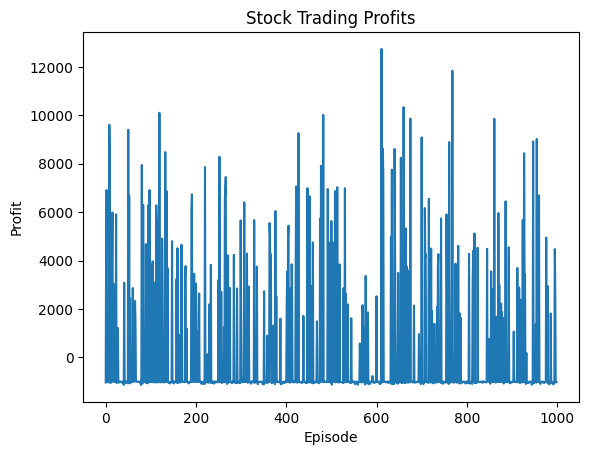

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Step 1: Extract historical stock data
def extract_stock_data(symbol):
    stock = yf.download(symbol, start='2010-01-01', end='2023-06-28')
    data = stock[['Close']].reset_index()
    return data

# Step 2: Prepare the data
def prepare_data(data):
    data['Returns'] = data['Close'].pct_change()  # Calculate the daily returns
    data = data.dropna()  # Remove any NaN values
    return data

# Step 3: Implement Reinforcement Learning model
class StockTrader:
    def __init__(self, data):
        self.data = data
        self.state = 0
        self.profit = 0

    def get_action(self):
        action = np.random.choice([-1, 1])  # Randomly choose between buying or selling
        return action

    def step(self, action):
        current_price = self.data.iloc[self.state]['Close']
        next_price = self.data.iloc[self.state + 1]['Close']
        if action == 1:  # Buy
            self.profit -= current_price
        elif action == -1:  # Sell
            self.profit += current_price
        self.state += 1
        done = self.state == len(self.data) - 1
        if done:
            self.profit += next_price  # Sell the remaining stock at the last price
        return self.profit, done

    def train(self, episodes):
        profits = []
        for episode in range(episodes):
            self.state = 0
            self.profit = 0
            done = False
            while not done:
                action = self.get_action()
                profit, done = self.step(action)
                if self.profit < -1000:  # If loss exceeds a threshold, end the episode
                    done = True
            profits.append(profit)
        return profits

# Main program
if __name__ == '__main__':
    # Step 1: Extract historical stock data
    stock_symbol = 'GOOGL'  # Change this to your desired stock symbol
    stock_data = extract_stock_data(stock_symbol)

    # Step 2: Prepare the data
    prepared_data = prepare_data(stock_data)

    # Step 3: Implement Reinforcement Learning model
    trader = StockTrader(prepared_data)
    episode_count = 1000
    profits = trader.train(episode_count)

    # Visualize the results
    plt.plot(profits)
    plt.title('Stock Trading Profits')
    plt.xlabel('Episode')
    plt.ylabel('Profit')
    plt.show()
